In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\marvel.csv', encoding='ISO-8859-1')
df.head()


,Title,Distributor(s),Release date(United States),Bud­get (mil­lions),Opening weekend(North America),North America,Other territories,Worldwide
0,Howard the Duck,Universal Pictures,August 1 1986,$37,$5070136,$16295774,$21667000,$37962774
1,Blade,New Line Cinema,August 21 1998,$45,$17073856,$70087718,$61095812,$131183530
2,X-Men,20th Century Fox,July 14 2000,$75,$54471475,$157299717,$139039810,$296339527
3,Blade II,New Line Cinema,March 22 2002,$54,$32528016,$82348319,$72661713,$155010032
4,Spider-Man,Sony Pictures,May 3 2002,$139,$114844116,$403706375,$418002176,$821708551


In [17]:
df.isnull().sum()
df = df.dropna() 

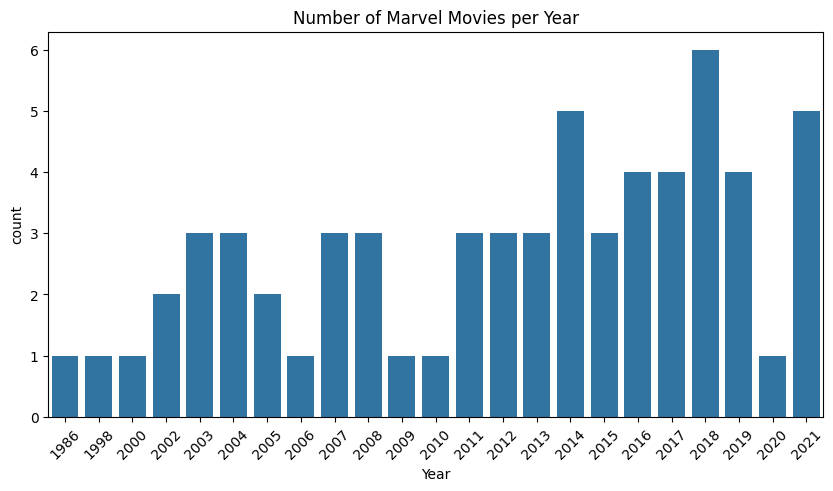

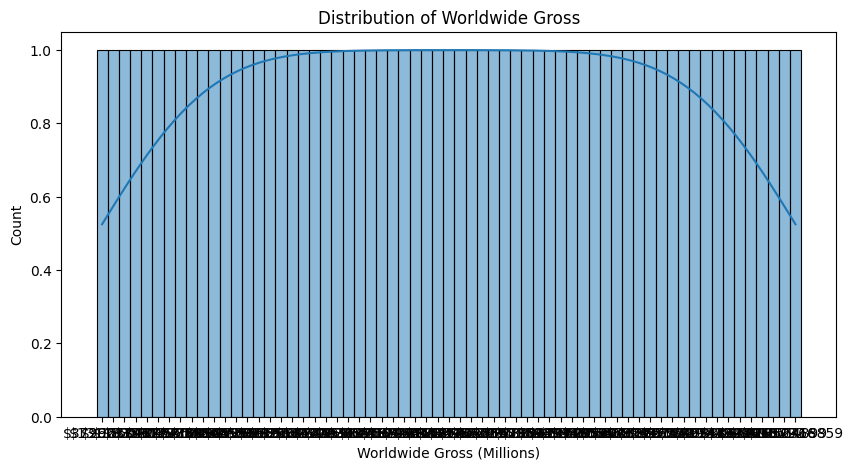

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df[~df['Release date(United States)'].isin(['Total', 'Average'])].copy()
df['Year'] = pd.to_datetime(df['Release date(United States)']).dt.year
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()))
plt.title("Number of Marvel Movies per Year")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Worldwide', kde=True)
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross (Millions)')
plt.ylabel('Count')
plt.show()


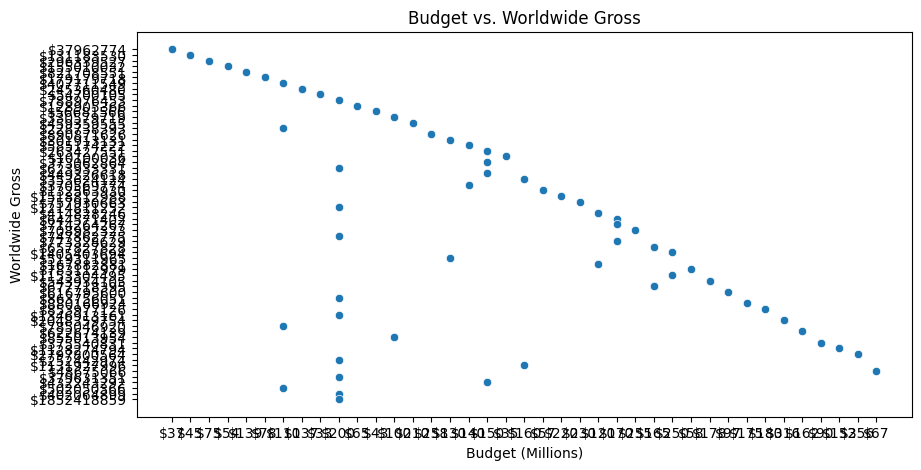

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Bud\u00adget (mil\u00adlions)', y='Worldwide')
plt.title("Budget vs. Worldwide Gross")
plt.xlabel("Budget (Millions)")
plt.ylabel("Worldwide Gross")
plt.show()

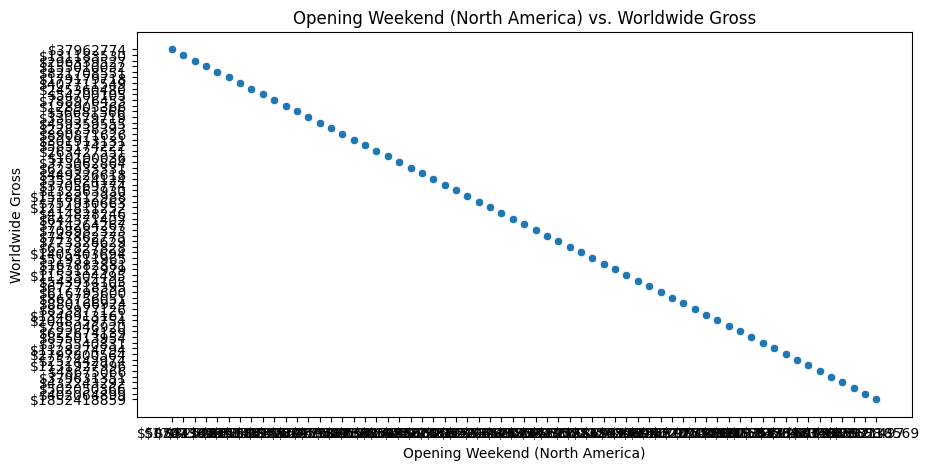

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Opening weekend(North America)', y='Worldwide')
plt.title("Opening Weekend (North America) vs. Worldwide Gross")
plt.xlabel("Opening Weekend (North America)")
plt.ylabel("Worldwide Gross")
plt.show()

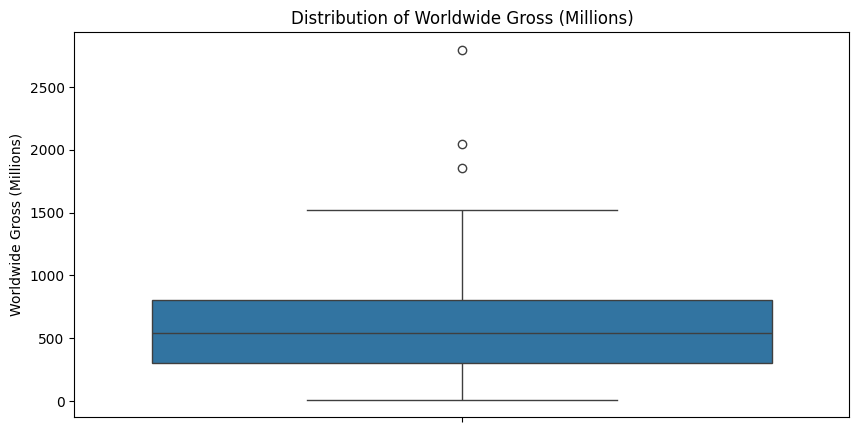

In [13]:
df['Worldwide_Millions'] = df['Worldwide'].astype(str).str.replace('[$,]', '', regex=True).astype(float) / 1_000_000

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, y='Worldwide_Millions')
plt.title('Distribution of Worldwide Gross (Millions)')
plt.ylabel('Worldwide Gross (Millions)')
plt.show()

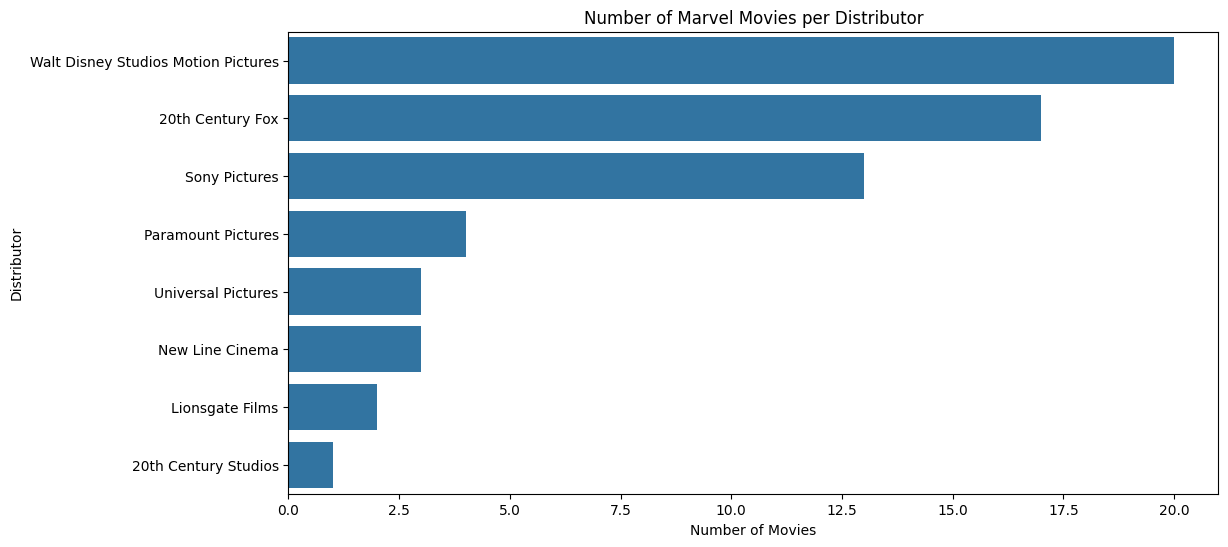

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Distributor(s)', order=df['Distributor(s)'].value_counts().index)
plt.title('Number of Marvel Movies per Distributor')
plt.xlabel('Number of Movies')
plt.ylabel('Distributor')
plt.show()

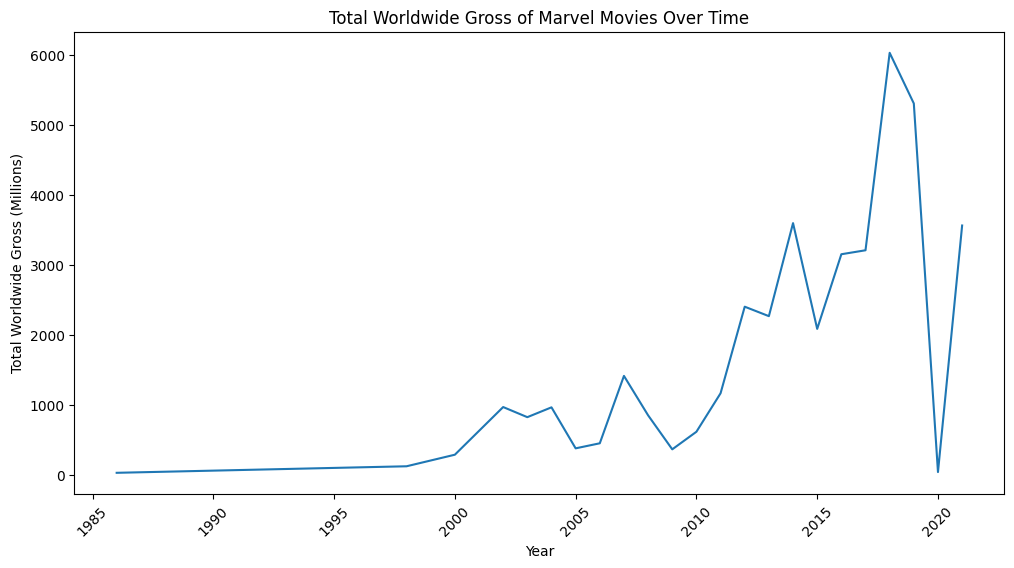

In [19]:
df = df[~df['Release date(United States)'].isin(['Total', 'Average'])].copy()
df['Year'] = pd.to_datetime(df['Release date(United States)']).dt.year
df['Worldwide_Millions'] = df['Worldwide'].astype(str).str.replace('[$,]', '', regex=True).astype(float) / 1_000_000
worldwide_gross_per_year = df.groupby('Year')['Worldwide_Millions'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=worldwide_gross_per_year, x='Year', y='Worldwide_Millions')
plt.title('Total Worldwide Gross of Marvel Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross (Millions)')
plt.xticks(rotation=45)
plt.show()